In [10]:
import sympy
import numpy as np
import math
import matplotlib.pyplot as plt
x = sympy.symbols('x')
y = sympy.symbols('y')
z = sympy.symbols('z')
func = z * (2 * x + 1)/x - 2 * y / x
yb = math.exp(2)
y_1 = 2
#z1 = 2
startX = 0
finishX = 1
eps = 0.001
v = 100
h = 0.01

In [11]:
# def graphic(a, b):
#     plt.grid(True)
#     plt.plot(a[0], a[1], color = 'red')
#     plt.plot(b[0], b[1], color = 'blue')
#     x1,x2,y1,y2 = plt.axis()
#     plt.axis((3,4,0,5))
#     plt.show()

In [12]:
def rungeKutta(arrayX, arrayY, arrayZ):
    for i in range(v):
        k1 = h*arrayZ[-1]
        l1 = h*func.subs([(x, arrayX[-1]),(y, arrayY[-1]),(z, arrayZ[-1])])
        k2 = h*(arrayZ[-1]+l1 / 2)
        l2 = h*func.subs([(x, arrayX[-1] + h / 2),(y, arrayY[-1]+ k1 / 2),(z, arrayZ[-1] + l1 / 2)])
        k3 = h*(arrayZ[-1]+l2 / 2)
        l3 = h*func.subs([(x, arrayX[-1] + h / 2),(y, arrayY[-1]+ k2 / 2),(z, arrayZ[-1] + l2 / 2)])
        k4 = h*(arrayZ[-1]+l3)
        l4 = h*func.subs([(x, arrayX[-1] + h),(y, arrayY[-1]+ k3),(z, arrayZ[-1] + l3)])
        #print(k1, l1, k2, l2, k3, l3, k4, l4)
        deltaY = 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        deltaZ = 1 / 6 * (l1 + 2 * l2 + 2 * l3 + l4)
        arrayX.append(arrayX[-1] + h)
        arrayY.append(arrayY[-1] + deltaY)
        arrayZ.append(arrayZ[-1] + deltaZ)
    return arrayX, arrayY, arrayZ

In [13]:
# def podstava(ny):
#     arrayX1 = [startX + eps]
#     arrayY1 = [y1]
#     arrayZ1 = [ny]
# #     print(arrayX1)
# #     print(arrayY1)
# #     print(arrayZ1)
#     arrayX1, arrayY1 = rungeKutta(v=v, h=h, arrayX=arrayX1, arrayY=arrayY1, arrayZ=arrayZ1)
#     print(arrayY1)
#     return arrayY1[-1]

In [14]:
def podstava(ny, x, z):
    y1 = ny
    x, y1, z = rungeKutta(arrayX = [x], arrayY = [y1], arrayZ = [z])
    return y1[-1], z[-1]

In [15]:
# def find_ny(ny_1, ny_2):
#     array_ny = [ny_1, ny_2]
#     y_last = podstava(ny_1)
#     foo = [y_last - yb]
#     if abs(foo[-1]) < eps: return ny_1
#     y_last = podstava(ny_2)
#     foo.append(y_last - yb)
#     while abs(foo[-1]) > eps:
#         array_ny.append(array_ny[-1] - (array_ny[-1] - array_ny[-2]) / (foo[-1] - foo[-2]) * foo[-1])
#         y_last = podstava(array_ny[-1])
#         foo.append(y_last - yb)
#     print(array_ny)
#     return array_ny[-1]

In [16]:
def find_ny(ny_1, ny_2, x, z):
    ny_3 = 0
    y_last, z_last = podstava(ny=ny_1, x=x, z=z)
    foo1 = y_last - yb
    if abs(foo1) < eps: return ny_1
    y_last, z_last = podstava(ny=ny_2, x=x, z=z)
    foo2 = y_last - yb
    while abs(ny_2 - ny_1) > eps:
#         ny_3 = (ny_1 + ny_2) / 2
        ny_3 = ny_2 - (ny_2 - ny_1) / (foo2 - foo1) * foo2
        ny_1 = ny_2
        ny_2 = ny_3
        print(ny_3)
        y_last, z_last = podstava(ny=ny_3, x=x, z=z)
        foo3 = y_last - yb
        foo1 = foo2
        foo2 = foo3
    return ny_3

In [17]:
# arrayX1 = [startX + eps]
# arrayY1 = [y1]
# arrayZ1 = [find_ny(ny_1 = 0, ny_2 = 1)]
# arrayX1, arrayY1 = rungeKutta(v=v, h=h, arrayX=arrayX1, arrayY=arrayY1, arrayZ=arrayZ1)
# print("GLEBOVOY\n", arrayY1)
# # arrayX2 = [startX]
# # arrayY2 = [y1]
# # arrayZ2 = [find_ny(ny_1 = 0, ny_2 = 1)]
# # arrayX2, arrayY2 = rungeKutta(v=100, h=0.01, arrayX=arrayX2, arrayY=arrayY2, arrayZ=arrayZ2)
# # a = (arrayX1, arrayY1)
# # b = (arrayX2, arrayY2)
# plt.grid(True)
# plt.plot(arrayX1, arrayY1, color = 'red')
# plt.show()
# # graphic(a=a, b=b)

In [18]:
arrayY1 = [find_ny(ny_1=-4, ny_2=4, x=startX+eps, z=y_1)]
print(arrayY1)
arrayX1 = [startX+eps]
arrayZ1 = [y_1]
arrayX1, arrayY1, arrayZ1 = rungeKutta(arrayX=arrayX1, arrayY=arrayY1, arrayZ=arrayZ1)

0.999999999991164
0.999999999991166
[0.999999999991166]


In [19]:
#func = e^(2x)
right_func = (math.exp(2)) ** x
print(right_func)
rightX = []
rightY = []

for i in range(v + 1):
    rightX.append(startX + h * i)
    rightY.append(right_func.subs(x, rightX[-1]))

7.38905609893065**x


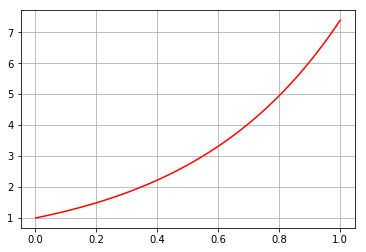

In [21]:
plt.grid(True)
plt.plot(arrayX1, arrayY1, color='red')
plt.show()

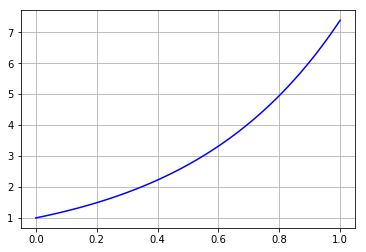

In [22]:
plt.grid(True)
plt.plot(rightX, rightY, color='blue')
plt.show()

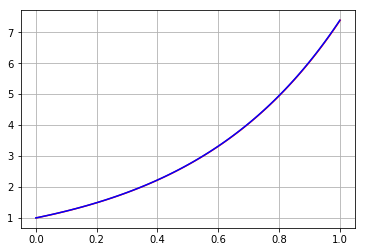

In [23]:
plt.grid(True)
plt.plot(arrayX1, arrayY1, color='red')
plt.plot(rightX, rightY, color='blue')
plt.show()